In [25]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 16)

def midpoint_method(f, a, b, tol):  # a and b need to have opposite sign
    cur = a
    iterations = 0

    while np.abs(b-a) > tol:
        cur = a + (b-a)/2.0
        if np.sign(f(a)) == np.sign(f(cur)):
            a = cur
        else:
            b = cur
        iterations += 1
    
    return a + (b-a)/2.0, iterations, a, b


This midpoint method has a linear convergence rate which means we normally expect the number of iterations to grow linearly as we increase the error tolerence

In [22]:
results = {'root':[], 'error':[], 'iterations':[]}
for i in range(1,9):
    root, iterations, left, right = midpoint_method(np.sin, 2, 4, 10**(-i))
    results['root'].append(root)
    results['error'].append(np.abs(np.pi - root))
    results['iterations'].append(iterations)

df = pd.DataFrame(results)
print(df)

             root           error  iterations
0  3.156250000000  0.014657346410           5
1  3.144531250000  0.002938596410           8
2  3.141113281250  0.000479372340          11
3  3.141571044922  0.000021608668          15
4  3.141590118408  0.000002535182          18
5  3.141592502594  0.000000150996          21
6  3.141592651606  0.000000001984          25
7  3.141592655331  0.000000001741          28


As expexted we see a linear trend in the data with each decimal place taking 3 iterations on average to determine. Now we can try the Secant method where we'll take take the last two approximations, draw a line through them then take the root of that line (this is essentially an approximation to Newtons Method). We'll use one step of the midpoint method to determine our first points

In [23]:
def secant_method(f, a, b, tol):
    prev = b
    cur = a + (b-a)/2
    new = cur
    iterations = 0

    while np.abs(prev-cur) > tol:
        new = cur - f(cur)*(cur-prev)/(f(cur)-f(prev))
        prev = cur
        cur = new
        iterations += 1
    
    return cur - f(cur)*(cur-prev)/(f(cur)-f(prev)), iterations

The convergance rate for this method is an exponent of (1 + sqrt(5))/2 (the golden ratio!). so we should see the number of iterations needed incease slower than linear but faster than a square root (NB quadratic convergence would mean accuracy increasing quadratically hence steps need increasing as a square root)

In [24]:

results = {'root':[], 'error':[], 'iterations':[]}
for i in range(1,9):
    root, iterations = secant_method(np.sin, 2, 4, 10**(-i))
    results['root'].append(root)
    results['error'].append(np.abs(np.pi - root))
    results['iterations'].append(iterations)

df = pd.DataFrame(results)
print(df)

             root           error  iterations
0  3.141592655459  0.000000001869           2
1  3.141592653590  0.000000000000           3
2  3.141592653590  0.000000000000           3
3  3.141592653590  0.000000000000           3
4  3.141592653590  0.000000000000           4
5  3.141592653590  0.000000000000           4
6  3.141592653590  0.000000000000           4
7  3.141592653590  0.000000000000           4


As expected we get MUCH better convergence with this method. At any higher accuracy the code will currently return an error since underflow causes the term (f(cur)-f(prev)) to evaluate to zero. We could address this by building in a set limit to the precision of the method or by adding a condition to stop when we encounter this scenario

In [ ]:
def secant_method(f, a, b, tol):
    prev = b
    cur = a + (b-a)/2
    new = cur
    iterations = 0

    while np.abs(prev-cur) > tol and f(cur)-f(prev) != 0.0:     # extra stopping condition added
        new = cur - f(cur)*(cur-prev)/(f(cur)-f(prev))
        prev = cur
        cur = new
        iterations += 1
    
    return cur - f(cur)*(cur-prev)/(f(cur)-f(prev)), iterations

Newtons method is defined as:

new = previous - f(previous)/f'(previous)

Note that we need to know the derivative to compute this method, if we dont know it and need to approximate it then we just get back the secant method. In the case that we know something about the form of the function we want to find the roots of we can leverage that to build a specialized implimentation of this meethod. As an example lets build a version of this method that will compute the root of a polynomial given some initial guess, we'll take the polynomial in the form of an array that specifies the coefficients of the polynomial in order ([1, 4, 1, 4] would be 1 + 4x + x^2 + 4x^3) 

In [28]:
def polynomial(coefficients, value):    # compute the polynomial and it's derivative at given value
    result = 0
    deriv = 0
    for i in range(2, len(coefficients)):
        if coefficients[i] == 0:
            continue
        else:
            result += coefficients[i]*(value**i)
            deriv += coefficients[i] * i * (value**(i-1))
    result += coefficients[0] + coefficients[1]*value
    deriv += coefficients[1]
    return result, deriv

def newton_method(coefficients, start, tol):
    prev = start
    cur = start - 1.0
    iterations = 0
    while np.abs(prev-cur) > tol:
        f, fp = polynomial(coefficients, cur)
        prev = cur
        cur -= f/fp
        iterations += 1
    return cur, iterations

print(polynomial([1, 1, 1, 1], 2))
print(polynomial([1, 4, 1, 4], 2))

(15, 17)
(45, 56)


This method may be useful for instances when we have a series of points rather than a function itself, we can do interpolation which will generate an array of coefficients to fit our data and then this method grants us an efficient way to accurately compute the roots. 

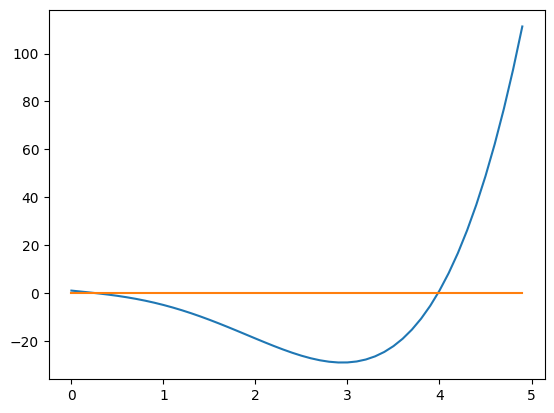

                 root  iterations
0  0.2513991742478219           3
1  0.2509325828052976           4
2  0.2509325828052976           4
3  0.2509324978020195           5
4  0.2509324978020195           5
5  0.2509324978020195           5
6  0.2509324978020195           5
7  0.2509324978020167           6


In [39]:
import matplotlib.pyplot as plt
X = np.arange(0,5,0.1)
z = np.zeros(len(X))
f = [polynomial([1, -4, 1, -4, 1], x)[0] for x in X]
plt.plot(X, f, X, z)
plt.show()

results = {'root':[], 'iterations':[]}
for i in range(1,9):
    root, iterations = newton_method([1, -4, 1, -4, 1], 2, 10**(-i))
    results['root'].append(root)
    results['iterations'].append(iterations)

df = pd.DataFrame(results)
print(df)